# Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import normaltest, shapiro

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

Matplotlib is building the font cache; this may take a moment.


### 1. Data Loading

In [3]:
columns = ['unit_id', 'time_cycles', 'op_setting_1', 'op_setting_2', 'op_setting_3'] + \
          [f'sensor_{i}' for i in range(1, 22)]
train_df = pd.read_csv('../data/raw/train_FD001.txt', sep='\s+', header=None, names=columns)
test_df = pd.read_csv('../data/raw/test_FD001.txt', sep='\s+', header=None, names=columns)
rul_df = pd.read_csv('../data/raw/RUL_FD001.txt', sep='\s+', header=None, names=['RUL'])

print("Data loaded successfully!")
print(f"Training set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")
print(f"RUL labels shape: {rul_df.shape}")

Data loaded successfully!
Training set shape: (20631, 26)
Test set shape: (13096, 26)
RUL labels shape: (100, 1)


### 2. Initial Data Inspection

In [4]:
print("First 5 Rows Of Data")
display(train_df.head())

print("Last 5 Rows Of Data")
display(train_df.tail())

First 5 Rows Of Data


,unit_id,time_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


Last 5 Rows Of Data


,unit_id,time_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640
20630,100,200,-0.0032,-0.0005,100.0,518.67,643.85,1600.38,1432.14,14.62,21.61,550.79,2388.26,9061.48,1.3,48.20,519.30,2388.26,8137.33,8.5036,0.03,396,2388,100.0,38.37,23.0522


In [5]:
print("Data Information")
train_df.info()

Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   unit_id       20631 non-null  int64  
 1   time_cycles   20631 non-null  int64  
 2   op_setting_1  20631 non-null  float64
 3   op_setting_2  20631 non-null  float64
 4   op_setting_3  20631 non-null  float64
 5   sensor_1      20631 non-null  float64
 6   sensor_2      20631 non-null  float64
 7   sensor_3      20631 non-null  float64
 8   sensor_4      20631 non-null  float64
 9   sensor_5      20631 non-null  float64
 10  sensor_6      20631 non-null  float64
 11  sensor_7      20631 non-null  float64
 12  sensor_8      20631 non-null  float64
 13  sensor_9      20631 non-null  float64
 14  sensor_10     20631 non-null  float64
 15  sensor_11     20631 non-null  float64
 16  sensor_12     20631 non-null  float64
 17  sensor_13     20631 non-null  float64
 18  sensor_14

In [6]:
print("Missing Values Check")
missing = train_df.isnull().sum()
if missing.sum() == 0:
    print("No missing values found!")
else:
    print(missing[missing > 0])

Missing Values Check
No missing values found!


In [7]:
print("Duplicate Check")
duplicates = train_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    print("Warning: Duplicates found!")
else:
    print("No duplicates found!")

Duplicate Check
Number of duplicate rows: 0
No duplicates found!


### 3. Statistical Summary

In [8]:
print("Statistical Summary")
display(train_df.describe().T)

Statistical Summary


,count,mean,std,min,25%,50%,75%,max
unit_id,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
time_cycles,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
op_setting_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
op_setting_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
op_setting_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
sensor_1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
sensor_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
sensor_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
sensor_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
sensor_5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200


In [9]:
print("Data Distribution Metrics")

distribution_stats = pd.DataFrame({
    'skewness': train_df.skew(),
    'kurtosis': train_df.kurtosis()
})

print("\nSkewness interpretation:")
print("  < -1 or > 1: Highly skewed")
print("  -1 to -0.5 or 0.5 to 1: Moderately skewed")
print("  -0.5 to 0.5: Approximately symmetric")
print("\nKurtosis interpretation:")
print("  > 3: Heavy tails (more outliers)")
print("  = 3: Normal distribution")
print("  < 3: Light tails (fewer outliers)")

display(distribution_stats)

Data Distribution Metrics

Skewness interpretation:
  < -1 or > 1: Highly skewed
  -1 to -0.5 or 0.5 to 1: Moderately skewed
  -0.5 to 0.5: Approximately symmetric

Kurtosis interpretation:
  > 3: Heavy tails (more outliers)
  = 3: Normal distribution
  < 3: Light tails (fewer outliers)


,skewness,kurtosis
unit_id,-0.067815,-1.219824
time_cycles,0.499904,-0.218539
op_setting_1,-0.024766,-0.009132
op_setting_2,0.009085,-1.130447
op_setting_3,0.000000,0.000000
sensor_1,0.000000,0.000000
sensor_2,0.316526,-0.112043
sensor_3,0.308946,0.007762
sensor_4,0.443194,-0.163681
sensor_5,0.000000,0.000000


### 4. Understanding Engine Behavior

In [10]:
print("Engine-Level Analysis")

n_engines = train_df['unit_id'].nunique()
print(f"\nTotal engines in training set: {n_engines}")

engine_lifecycle = train_df.groupby('unit_id')['time_cycles'].max()
print(f"\nEngine Lifecycle Statistics:")
print(f" - Average cycles to failure: {engine_lifecycle.mean():.2f}")
print(f" - Shortest lifecycle: {engine_lifecycle.min()} cycles")
print(f" - Longest lifecycle: {engine_lifecycle.max()} cycles")
print(f" - Standard deviation: {engine_lifecycle.std():.2f}")

print(f"\nLifecycle Distribution:")
display(engine_lifecycle.describe())

Engine-Level Analysis

Total engines in training set: 100

Engine Lifecycle Statistics:
 - Average cycles to failure: 206.31
 - Shortest lifecycle: 128 cycles
 - Longest lifecycle: 362 cycles
 - Standard deviation: 46.34

Lifecycle Distribution:


count    100.000000
mean     206.310000
std       46.342749
min      128.000000
25%      177.000000
50%      199.000000
75%      229.250000
max      362.000000
Name: time_cycles, dtype: float64

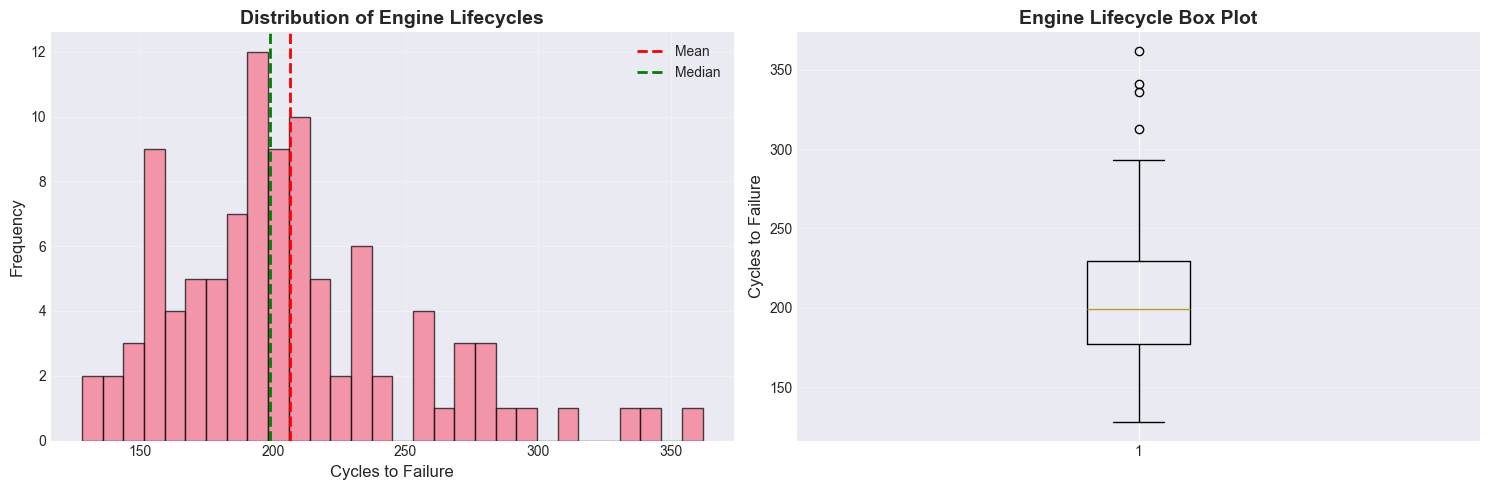


Key Observations:
  - Look for the shape of the distribution
  - Check if mean and median are close
  - Identify outliers in the box plot


In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(engine_lifecycle, bins=30, edgecolor='black', alpha=0.7)
axes[0].axvline(engine_lifecycle.mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0].axvline(engine_lifecycle.median(), color='green', linestyle='--', linewidth=2, label='Median')
axes[0].set_xlabel('Cycles to Failure', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Engine Lifecycles', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].boxplot(engine_lifecycle, vert=True)
axes[1].set_ylabel('Cycles to Failure', fontsize=12)
axes[1].set_title('Engine Lifecycle Box Plot', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nKey Observations:")
print("  - Look for the shape of the distribution")
print("  - Check if mean and median are close")
print("  - Identify outliers in the box plot")

### 5. Sensor Analysis

In [12]:
print("Sensor Variability Analysis")

sensor_cols = [col for col in train_df.columns if 'sensor' in col]
sensor_variance = train_df[sensor_cols].var()

constant_sensors = sensor_variance[sensor_variance < 0.01].index.tolist()
print(f"\nSensors with near-zero variance (potentially useless):")
for sensor in constant_sensors:
    print(f"  - {sensor}: variance = {sensor_variance[sensor]:.6f}")

high_var_sensors = sensor_variance.nlargest(5)
print(f"\n Top 5 sensors with highest variance (potentially useful):")
for sensor, var in high_var_sensors.items():
    print(f"  - {sensor}: variance = {var:.2f}")

Sensor Variability Analysis

Sensors with near-zero variance (potentially useless):
  - sensor_1: variance = 0.000000
  - sensor_5: variance = 0.000000
  - sensor_6: variance = 0.000002
  - sensor_8: variance = 0.005039
  - sensor_10: variance = 0.000000
  - sensor_13: variance = 0.005172
  - sensor_15: variance = 0.001407
  - sensor_16: variance = 0.000000
  - sensor_18: variance = 0.000000
  - sensor_19: variance = 0.000000

 Top 5 sensors with highest variance (potentially useful):
  - sensor_9: variance = 487.65
  - sensor_14: variance = 363.90
  - sensor_4: variance = 81.01
  - sensor_3: variance = 37.59
  - sensor_17: variance = 2.40


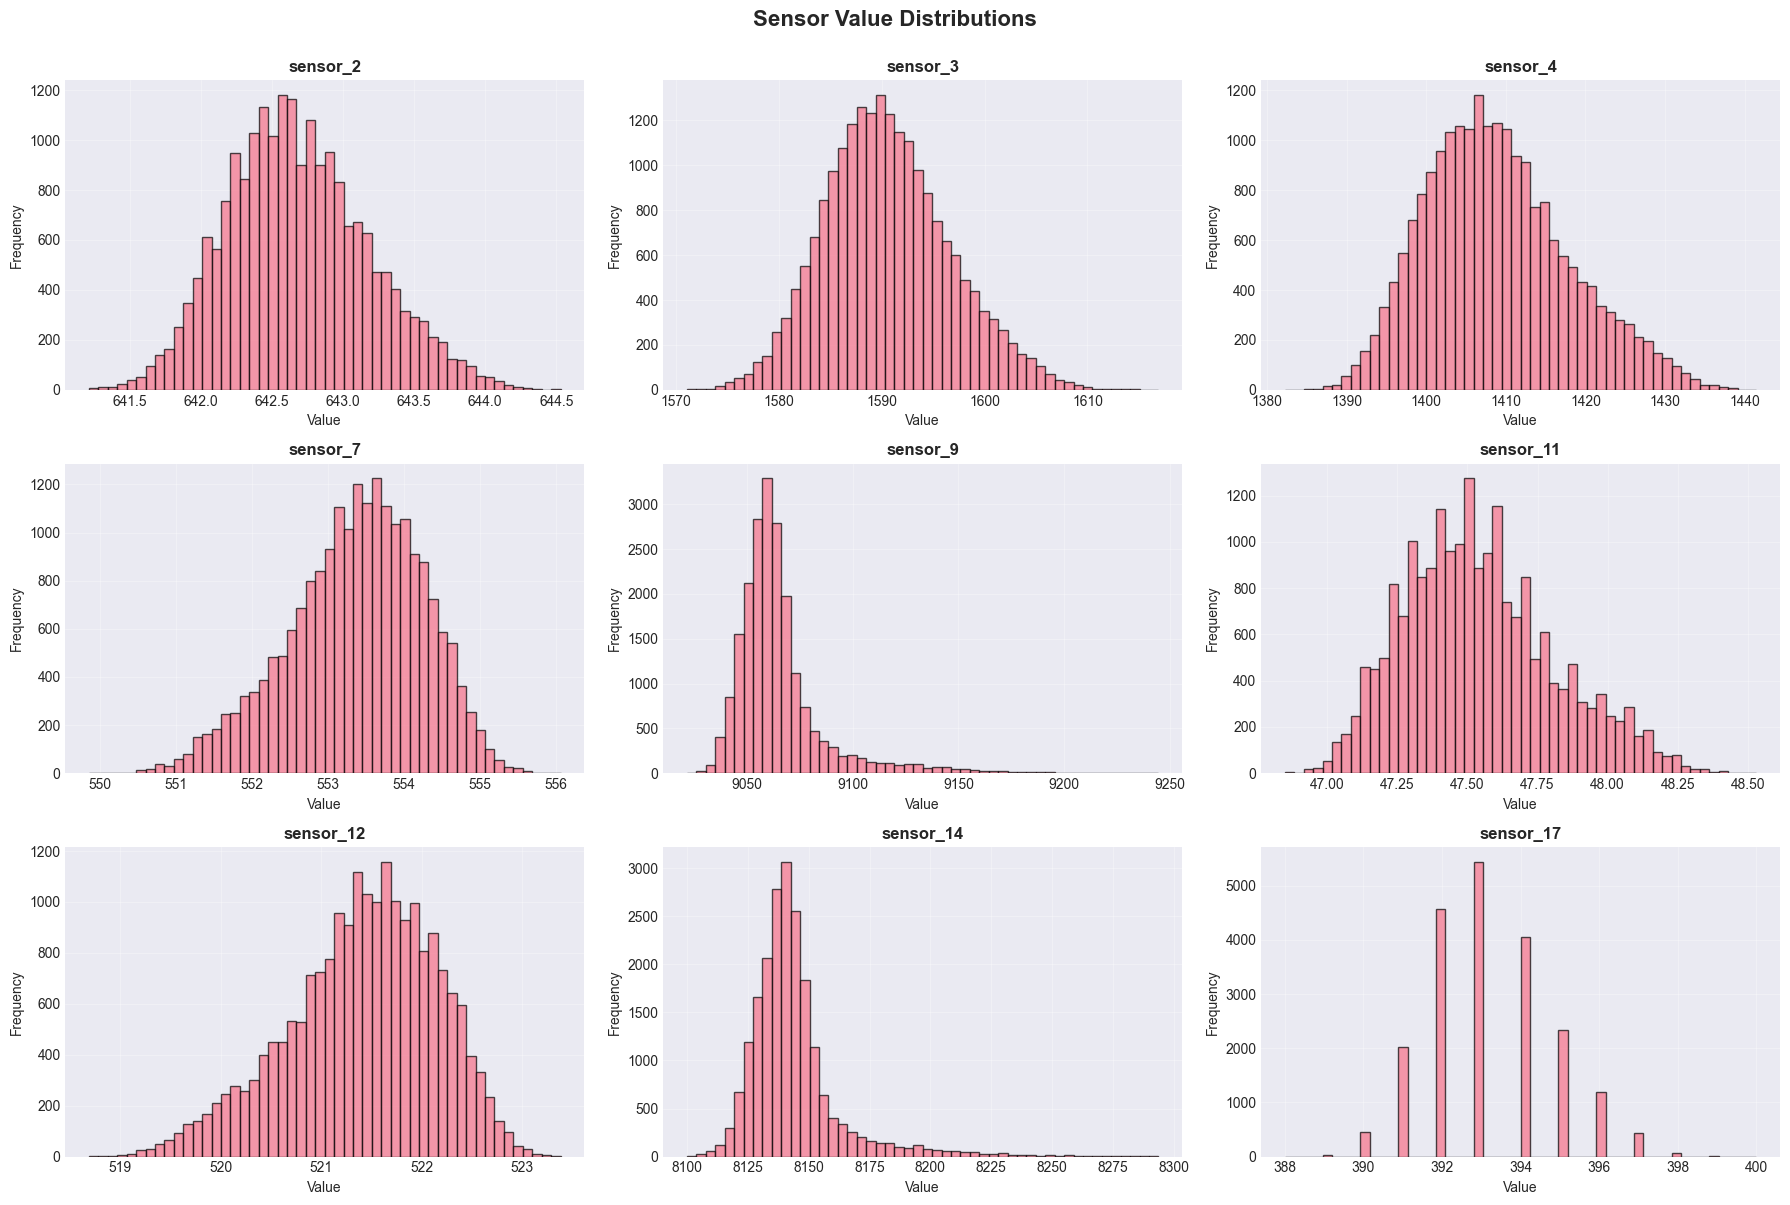


 What to look for:
  - Normal distribution vs skewed distribution
  - Multiple peaks (bimodal/multimodal)
  - Outliers or unusual patterns


In [13]:
useful_sensors = [s for s in sensor_cols if s not in constant_sensors][:9]

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, sensor in enumerate(useful_sensors):
    axes[idx].hist(train_df[sensor], bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{sensor}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Value', fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Sensor Value Distributions', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n What to look for:")
print("  - Normal distribution vs skewed distribution")
print("  - Multiple peaks (bimodal/multimodal)")
print("  - Outliers or unusual patterns")

### 6. Outlier Detection

In [14]:
def detect_outliers_iqr(df, column):
    """
    IQR Method:
    - Q1 = 25th percentile
    - Q3 = 75th percentile
    - IQR = Q3 - Q1
    - Outliers are values < Q1 - 1.5*IQR or > Q3 + 1.5*IQR
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("Outlier Detection - IQR Method")

outlier_summary = {}
for sensor in useful_sensors[:5]:
    outliers, lower, upper = detect_outliers_iqr(train_df, sensor)
    outlier_pct = (len(outliers) / len(train_df)) * 100
    outlier_summary[sensor] = {
        'count': len(outliers),
        'percentage': outlier_pct,
        'lower_bound': lower,
        'upper_bound': upper
    }
    print(f"\n{sensor}:")
    print(f"  • Outliers detected: {len(outliers)} ({outlier_pct:.2f}%)")
    print(f"  • Valid range: [{lower:.2f}, {upper:.2f}]")

Outlier Detection - IQR Method

sensor_2:
  • Outliers detected: 128 (0.62%)
  • Valid range: [641.31, 644.01]

sensor_3:
  • Outliers detected: 165 (0.80%)
  • Valid range: [1574.08, 1606.56]

sensor_4:
  • Outliers detected: 120 (0.58%)
  • Valid range: [1384.07, 1432.85]

sensor_7:
  • Outliers detected: 110 (0.53%)
  • Valid range: [551.01, 555.81]

sensor_9:
  • Outliers detected: 1686 (8.17%)
  • Valid range: [9028.62, 9093.90]


In [15]:
def detect_outliers_zscore(df, column, threshold=3):
    """
    Z-Score Method:
    - Calculate how many standard deviations away from mean
    - Typically, |z-score| > 3 is considered an outlier
    """
    z_scores = np.abs(stats.zscore(df[column].dropna()))
    outlier_indices = np.where(z_scores > threshold)[0]
    return df.iloc[outlier_indices]

print("Outlier Detection - Z-Score Method")

for sensor in useful_sensors[:5]:
    outliers = detect_outliers_zscore(train_df, sensor)
    outlier_pct = (len(outliers) / len(train_df)) * 100
    print(f"\n{sensor}:")
    print(f"  - Outliers detected: {len(outliers)} ({outlier_pct:.2f}%)")

Outlier Detection - Z-Score Method

sensor_2:
  - Outliers detected: 31 (0.15%)

sensor_3:
  - Outliers detected: 47 (0.23%)

sensor_4:
  - Outliers detected: 36 (0.17%)

sensor_7:
  - Outliers detected: 34 (0.16%)

sensor_9:
  - Outliers detected: 521 (2.53%)


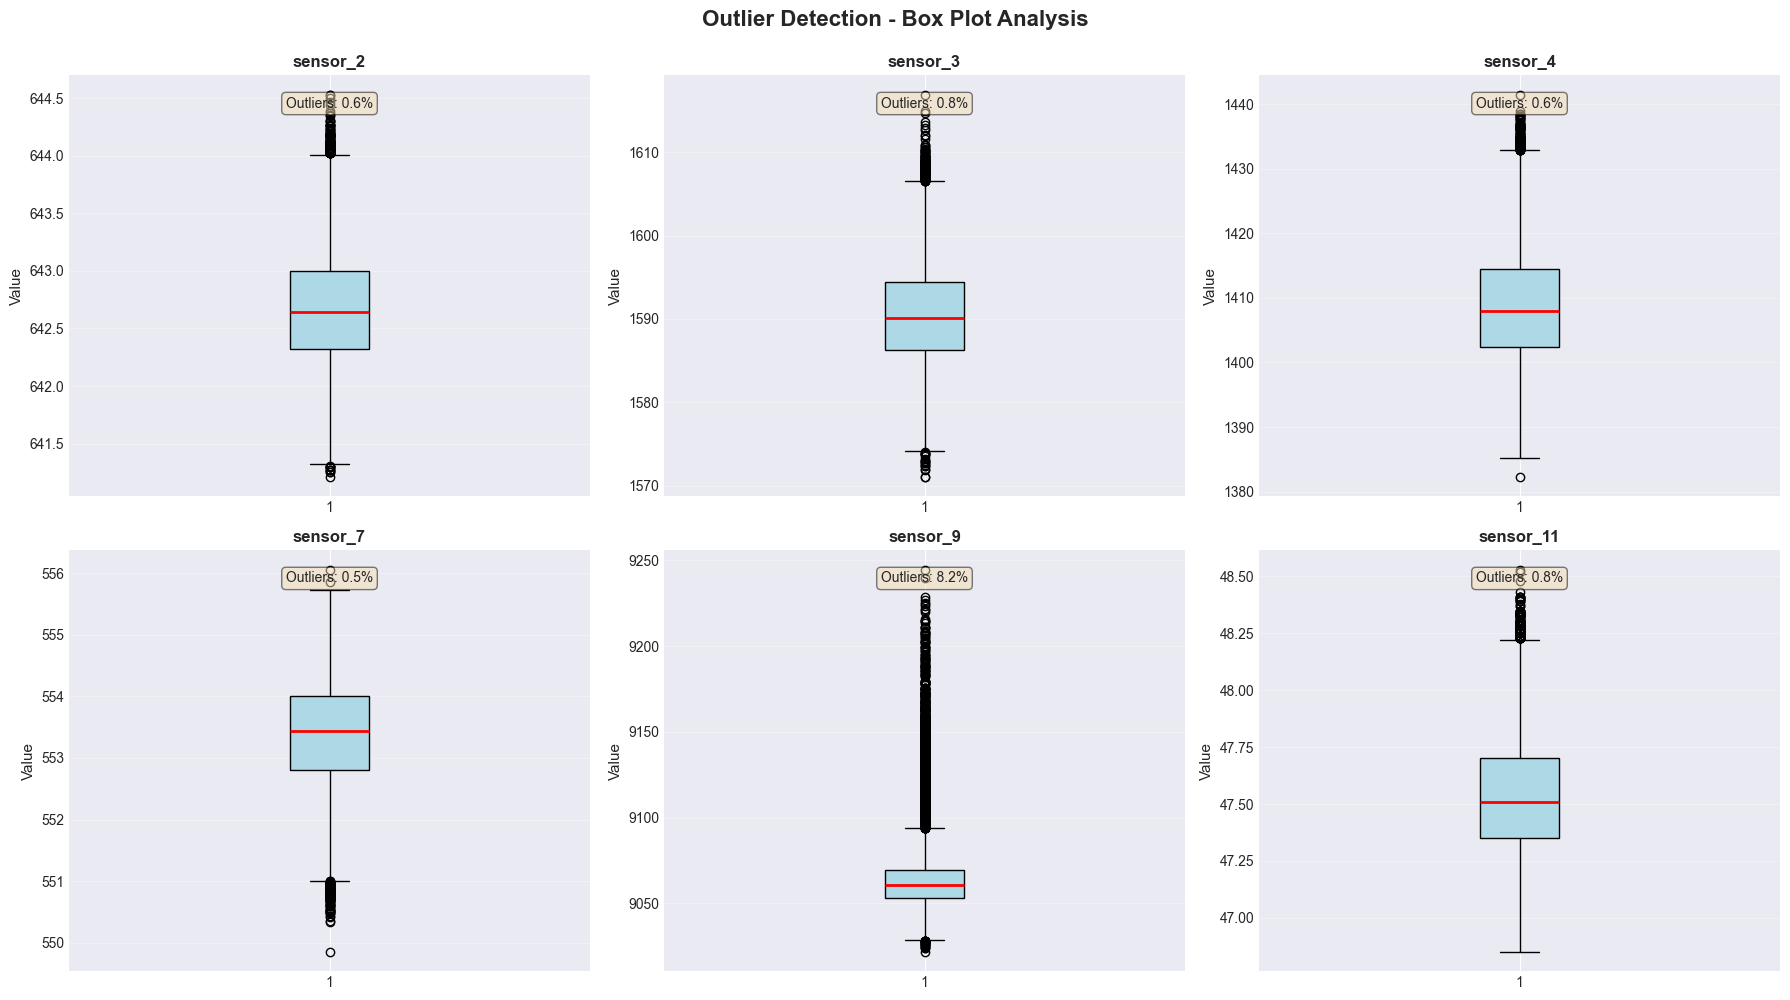


 How to read box plots:
  - Box represents middle 50% of data (Q1 to Q3)
  - Red line = Median
  - Whiskers = 1.5 x IQR from the box
  - Points beyond whiskers = Outliers


In [16]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, sensor in enumerate(useful_sensors[:6]):
    bp = axes[idx].boxplot(train_df[sensor], vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['medians'][0].set(color='red', linewidth=2)
    
    axes[idx].set_ylabel('Value', fontsize=11)
    axes[idx].set_title(f'{sensor}', fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3, axis='y')

    outliers, lower, upper = detect_outliers_iqr(train_df, sensor)
    outlier_pct = (len(outliers) / len(train_df)) * 100
    axes[idx].text(0.5, 0.95, f'Outliers: {outlier_pct:.1f}%', 
                   transform=axes[idx].transAxes, 
                   ha='center', va='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle('Outlier Detection - Box Plot Analysis', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\n How to read box plots:")
print("  - Box represents middle 50% of data (Q1 to Q3)")
print("  - Red line = Median")
print("  - Whiskers = 1.5 x IQR from the box")
print("  - Points beyond whiskers = Outliers")

### 7. Correlation Analysis

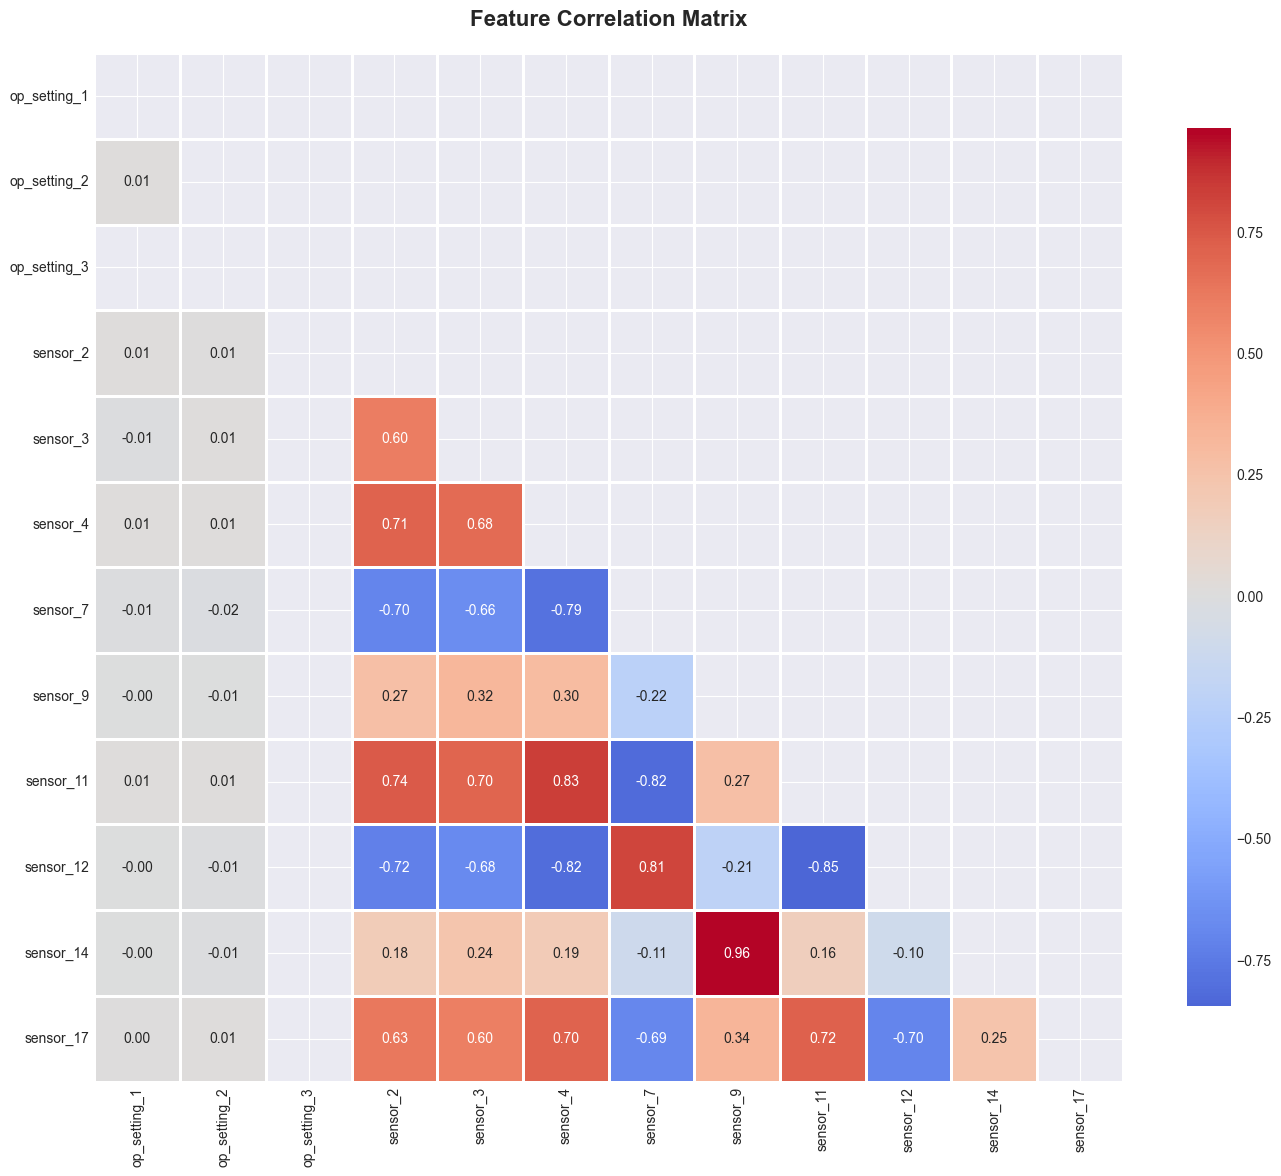


 How to read this:
  - Red = Positive correlation (values increase together)
  - Blue = Negative correlation (one increases, other decreases)
  - White = No correlation


In [18]:
features_to_analyze = ['op_setting_1', 'op_setting_2', 'op_setting_3'] + useful_sensors[:9]
correlation_matrix = train_df[features_to_analyze].corr()

plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n How to read this:")
print("  - Red = Positive correlation (values increase together)")
print("  - Blue = Negative correlation (one increases, other decreases)")
print("  - White = No correlation")

In [20]:
print("Highly Correlated Feature Pairs")

upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

high_corr_pairs = []
for column in upper_triangle.columns:
    for index in upper_triangle.index:
        corr_value = upper_triangle.loc[index, column]
        if abs(corr_value) > 0.8:
            high_corr_pairs.append((index, column, corr_value))

if high_corr_pairs:
    print("\n Feature pairs with |correlation| > 0.8:")
    for feat1, feat2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
        print(f"  - {feat1} <-> {feat2}: {corr:.3f}")
    print("\n Consider removing one feature from each pair to reduce redundancy")
else:
    print("\n No feature pairs with correlation > 0.8")

Highly Correlated Feature Pairs

 Feature pairs with |correlation| > 0.8:
  - sensor_9 <-> sensor_14: 0.963
  - sensor_11 <-> sensor_12: -0.847
  - sensor_4 <-> sensor_11: 0.830
  - sensor_7 <-> sensor_11: -0.823
  - sensor_4 <-> sensor_12: -0.816
  - sensor_7 <-> sensor_12: 0.813

 Consider removing one feature from each pair to reduce redundancy


### 8. Time Series Behavior

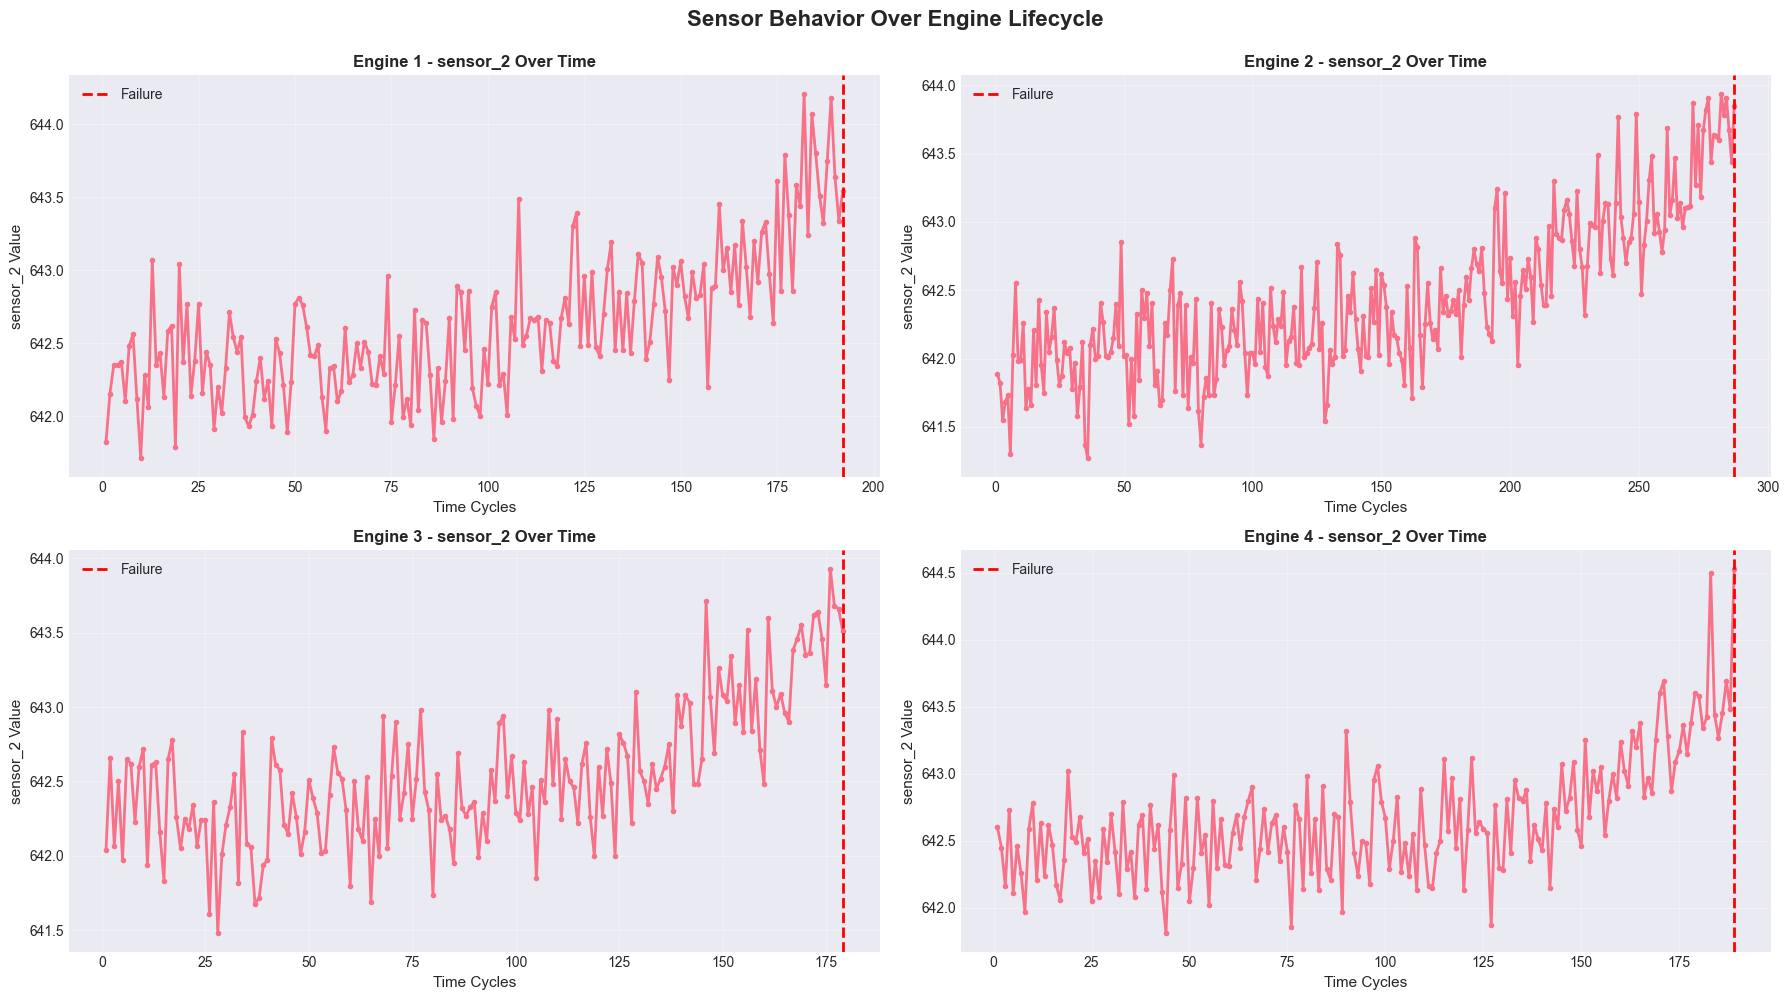


 Look for:
  - Gradual degradation trends
  - Sudden changes before failure
  - Different patterns across engines


In [21]:
sample_engines = train_df['unit_id'].unique()[:4]

fig, axes = plt.subplots(2, 2, figsize=(18, 10))
axes = axes.ravel()

sensor_to_plot = useful_sensors[0]

for idx, engine_id in enumerate(sample_engines):
    engine_data = train_df[train_df['unit_id'] == engine_id]
    
    axes[idx].plot(engine_data['time_cycles'], 
                   engine_data[sensor_to_plot],
                   linewidth=2,
                   marker='o',
                   markersize=3)
    
    axes[idx].set_xlabel('Time Cycles', fontsize=11)
    axes[idx].set_ylabel(f'{sensor_to_plot} Value', fontsize=11)
    axes[idx].set_title(f'Engine {engine_id} - {sensor_to_plot} Over Time', 
                        fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    
    max_cycle = engine_data['time_cycles'].max()
    axes[idx].axvline(max_cycle, color='red', linestyle='--', 
                      linewidth=2, label='Failure')
    axes[idx].legend()

plt.suptitle('Sensor Behavior Over Engine Lifecycle', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\n Look for:")
print("  - Gradual degradation trends")
print("  - Sudden changes before failure")
print("  - Different patterns across engines")

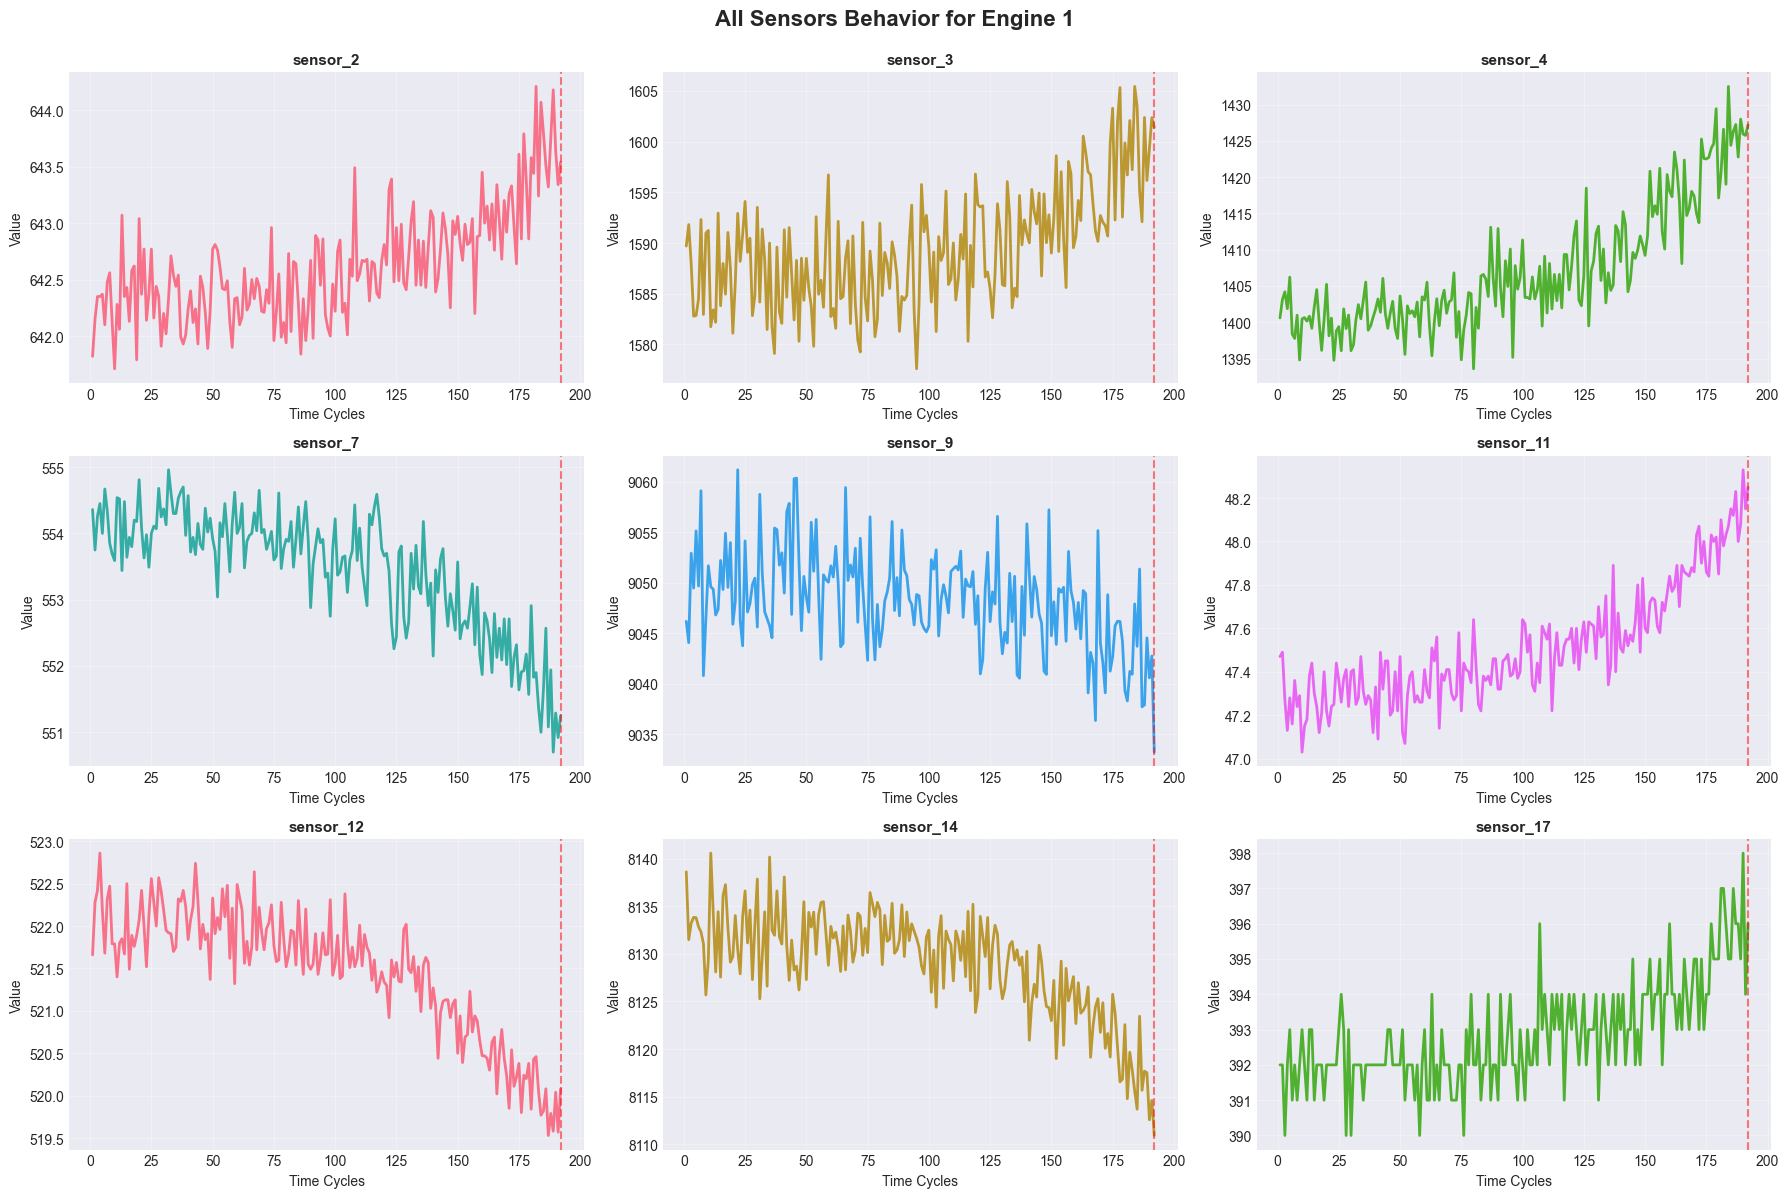

In [22]:
selected_engine = sample_engines[0]
engine_data = train_df[train_df['unit_id'] == selected_engine]

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, sensor in enumerate(useful_sensors[:9]):
    axes[idx].plot(engine_data['time_cycles'], 
                   engine_data[sensor],
                   linewidth=2,
                   color=f'C{idx}')
    
    axes[idx].set_xlabel('Time Cycles', fontsize=10)
    axes[idx].set_ylabel('Value', fontsize=10)
    axes[idx].set_title(f'{sensor}', fontsize=11, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

    max_cycle = engine_data['time_cycles'].max()
    axes[idx].axvline(max_cycle, color='red', linestyle='--', alpha=0.5)

plt.suptitle(f'All Sensors Behavior for Engine {selected_engine}', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

### 9. Hypothesis Testing

In [25]:
print("Hypothesis Test 1: Normality Test")
print("\nNull Hypothesis (H0): Data is normally distributed")
print("Alternative Hypothesis (H1): Data is NOT normally distributed")
print("\nIf p-value < 0.05, we reject H0 (data is not normal)")

normality_results = {}
for sensor in useful_sensors[:5]:
    sample_data = train_df[sensor].sample(min(5000, len(train_df)), random_state=42)

    statistic, p_value = shapiro(sample_data)
    
    is_normal = p_value > 0.05
    normality_results[sensor] = {'statistic': statistic, 'p_value': p_value, 'is_normal': is_normal}
    
    print(f"\n{sensor}:")
    print(f"  - Test Statistic: {statistic:.6f}")
    print(f"  - P-value: {p_value:.6f}")
    print(f"  - Result: {' Normal' if is_normal else ' Not Normal'}")

Hypothesis Test 1: Normality Test

Null Hypothesis (H0): Data is normally distributed
Alternative Hypothesis (H1): Data is NOT normally distributed

If p-value < 0.05, we reject H0 (data is not normal)

sensor_2:
  - Test Statistic: 0.992862
  - P-value: 0.000000
  - Result:  Not Normal

sensor_3:
  - Test Statistic: 0.994305
  - P-value: 0.000000
  - Result:  Not Normal

sensor_4:
  - Test Statistic: 0.984053
  - P-value: 0.000000
  - Result:  Not Normal

sensor_7:
  - Test Statistic: 0.986511
  - P-value: 0.000000
  - Result:  Not Normal

sensor_9:
  - Test Statistic: 0.787513
  - P-value: 0.000000
  - Result:  Not Normal


In [ ]:
print("Hypothesis Test 2: Early VS Late Lifecycle")
print("\nNull Hypothesis (H0): No difference between early and late lifecycle")
print("Alternative Hypothesis (H1): Significant difference exists")
print("\nIf p-value < 0.05, we reject H0 (there IS a difference)")

early_late_results = {}

for sensor in useful_sensors[:5]:
    early_data = []
    late_data = []
    
    for engine_id in train_df['unit_id'].unique():
        engine_data = train_df[train_df['unit_id'] == engine_id].sort_values('time_cycles')
        max_cycle = engine_data['time_cycles'].max()

        early = engine_data[engine_data['time_cycles'] <= max_cycle * 0.2][sensor].values

        late = engine_data[engine_data['time_cycles'] >= max_cycle * 0.8][sensor].values
        
        early_data.extend(early)
        late_data.extend(late)

    t_stat, p_value = stats.ttest_ind(early_data, late_data)
    
    mean_diff = np.mean(late_data) - np.mean(early_data)
    is_significant = p_value < 0.05
    
    early_late_results[sensor] = {
        't_statistic': t_stat,
        'p_value': p_value,
        'mean_difference': mean_diff,
        'is_significant': is_significant
    }
    
    print(f"\n{sensor}:")
    print(f"  - Early lifecycle mean: {np.mean(early_data):.4f}")
    print(f"  - Late lifecycle mean: {np.mean(late_data):.4f}")
    print(f"  - Mean difference: {mean_diff:.4f}")
    print(f"  - T-statistic: {t_stat:.4f}")
    print(f"  - P-value: {p_value:.6f}")
    print(f"  - Result: {'Significant difference' if is_significant else ' No significant difference'}")